In [44]:
import numpy as np
from math import floor

def load_dataset(dataset_name="", dataset_date=""):

  data_path = "./datasets/" + dataset_name + "_data.npy"
  labels_path = "./datasets/" + dataset_name + "_labels.npy"

  print("data path:", data_path)
  print("labels path:", labels_path)

  data = np.load(data_path, allow_pickle=True)
  labels = np.load(labels_path, allow_pickle=True)

  return data, labels
    
# from load_dataset import load_dataset

# ==================== LOAD DATA ====================
batch_size = 50
total_samples = 50000

dataset_name = "batchsize_" + str(batch_size) + "_total_samples_" + str(
    total_samples) + "_date_20211030_1323"


data, labels = load_dataset(dataset_name)

print("data.shape:", data.shape)
print("lablels.shape:", labels.shape)

# print(np.reshape(data[0], [10, 10]))
# print(np.reshape(data[1], [10, 10]))
# print(np.reshape(data[2], [10, 10]))

# print("======== LABELS ========")
# print(np.reshape(labels[0][0], [10, 10]))
# print(np.reshape(labels[1][0], [10, 10]))
# print(np.reshape(labels[2][0], [10, 10]))

# Reserve 15% data for validation and evaluation, respectively
val_eval_amount = floor(data.shape[0] * 0.30)
val_eval_data = data[-val_eval_amount:]
val_eval_labels = labels[-val_eval_amount:]
val_amount = floor(val_eval_data.shape[0] * 0.50)
val_data, eval_data = val_eval_data[-val_amount:], val_eval_data[:-val_amount]
val_labels, eval_labels = val_eval_labels[
    -val_amount:], val_eval_labels[:-val_amount]

# Set training data to remaining 70%
data = data[:-val_eval_amount]
# print("val_eval_amount:", val_eval_amount)
# print("data.shape[0]:", data.shape[0])
# print("data.shape[1]:", data.shape[1])
labels = labels[:-val_eval_amount]

# Reshape data from array of batches to long array
data = np.reshape(data, [data.shape[0]*data.shape[1], 100])
labels = np.reshape(labels, [labels.shape[0]*labels.shape[1], 100])

val_data = np.reshape(val_data, [val_data.shape[0]*val_data.shape[1], 100])
val_labels = np.reshape(val_labels, [val_labels.shape[0]*val_labels.shape[1], 100])

eval_data = np.reshape(eval_data, [eval_data.shape[0]*eval_data.shape[1], 100])
eval_labels = np.reshape(eval_labels, [eval_labels.shape[0]*eval_labels.shape[1], 100])

print("data.shape:", data.shape)
print("labels.shape:", labels.shape)
print("val_data.shape:", val_data.shape)
print("val_labels.shape:", val_labels.shape)
print("eval_data.shape:", eval_data.shape)
print("eval_labels.shape:", eval_labels.shape)

# data = data.tolist()
# labels = labels.tolist()

# val_data = val_data.tolist()
# val_labels = val_labels.tolist()

# eval_data = eval_data.tolist()
# eval_labels = eval_labels.tolist()

print("type(data):", type(data))
print("type(labels):", type(labels))
print("type(data[0][0]):", type(data[0][0]))
print("type(labels[0][0]):", type(labels[0][0]))


data path: ./datasets/batchsize_50_total_samples_50000_date_20211030_1323_data.npy
labels path: ./datasets/batchsize_50_total_samples_50000_date_20211030_1323_labels.npy
data.shape: (1000, 50, 100)
lablels.shape: (1000, 50, 100)
data.shape: (35000, 100)
labels.shape: (35000, 100)
val_data.shape: (7500, 100)
val_labels.shape: (7500, 100)
eval_data.shape: (7500, 100)
eval_labels.shape: (7500, 100)
type(data): <class 'numpy.ndarray'>
type(labels): <class 'numpy.ndarray'>
type(data[0][0]): <class 'numpy.float32'>
type(labels[0][0]): <class 'numpy.float32'>


In [45]:

from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

print("tf.__version__:", tf.__version__)

# ==================== BUILD MODEL ====================

model_type = "fully_connected"
model_type = "fully_sigmoid"
# model_type = "cnn"

model = Sequential(name=model_type)

if model_type == "fully_connected":
  model.add(Input(shape=(100)))
  model.add(Dense(100, activation='tanh'))
  model.add(Dense(100, activation='tanh'))
  # model.add(Dense(100))
  model.add(Dense(100, activation='sigmoid'))

if model_type == "fully_sigmoid":
  model.add(Input(shape=(100)))
  model.add(Dense(100, activation='sigmoid'))
  model.add(Dense(100, activation='sigmoid'))
  model.add(Dense(100))

if model_type == "cnn":
  model.add(Input(shape=(10,10,1)))
  model.add(Conv2D(25, (3, 3), activation='relu', padding='same'))
  model.add(Flatten())
  # model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='sigmoid'))
  
print("model.output_shape:", model.output_shape)

# Compile model
model.compile(
    # optimizer=Adam(learning_rate=0.001),
    optimizer=Adam(learning_rate=0.001,
                   beta_1=0.9,
                   beta_2=0.999,
                   epsilon=1e-08),
    # Loss function to minimize
    loss=losses.BinaryCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=["accuracy"]
)

# Display model"s architecture
model.summary()


tf.__version__: 2.6.0
model.output_shape: (None, 100)
Model: "fully_sigmoid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
Total params: 30,300
Trainable params: 30,300
Non-trainable params: 0
_________________________________________________________________


In [46]:

# ==================== RESHAPE IF CNN ====================

# NOT WORKING!
if model_type == "cnn":
  # Reshape data (100->10x10) if CNN
  data = np.reshape(data, [data.shape[0], 10, 10])
  labels = np.reshape(labels, [labels.shape[0], 10, 10])

  val_data = np.reshape(val_data, [val_data.shape[0], 10, 10])
  val_labels = np.reshape(val_labels, [val_labels.shape[0], 10, 10])

  eval_data = np.reshape(eval_data, [eval_data.shape[0], 10, 10])
  eval_labels = np.reshape(eval_labels, [eval_labels.shape[0], 10, 10])

  print("data.shape:", data.shape)
  print("labels.shape:", labels.shape)
  print("val_data.shape:", val_data.shape)
  print("val_labels.shape:", val_labels.shape)
  print("eval_data.shape:", eval_data.shape)
  print("eval_labels.shape:", eval_labels.shape)


# ================================================


# ==================== TRAIN MODEL ====================

epochs = 100 # How many times you run through the dataset (max)
initial_epoch = 0

# Set early stopping as callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    data, 
    labels,
    batch_size=50,
    epochs=epochs,
    initial_epoch=initial_epoch,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping]
    )

# ================================================


Epoch 1/100
700/700 [==============================] - 3s 3ms/step - loss: 0.4417 - accuracy: 0.0036 - val_loss: 0.4090 - val_accuracy: 0.0071
Epoch 2/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.0127 - val_loss: 0.3634 - val_accuracy: 0.0119
Epoch 3/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3513 - accuracy: 0.0159 - val_loss: 0.3415 - val_accuracy: 0.0140
Epoch 4/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3340 - accuracy: 0.0170 - val_loss: 0.3282 - val_accuracy: 0.0172
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3221 - accuracy: 0.0177 - val_loss: 0.3187 - val_accuracy: 0.0167
Epoch 6/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3138 - accuracy: 0.0184 - val_loss: 0.3116 - val_accuracy: 0.0159
Epoch 7/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3077 - accuracy: 0.0185 - val_loss: 0.3071 - val_accuracy: 0.0159

In [47]:
import pytz

#  Save model to HDF5 file
time_format = datetime.now(pytz.timezone("CET")).strftime("%Y%m%d-%H%M")
# print(time_format)

model_name = model_type + "_bsz_" + str(
    batch_size) + "_sampl_" + str(total_samples) + "_epochs_" + str(
        len(history.history["loss"])) + "_"+ time_format
filepath = "models/" + model_name + ".h5"
print("model_name:", model_name)
print("filepath:", filepath)
model.save(filepath)
print("Saved model to {}".format(filepath))



model_name: fully_sigmoid_bsz_50_sampl_50000_epochs_100_20211102-1251
filepath: models/fully_sigmoid_bsz_50_sampl_50000_epochs_100_20211102-1251.h5
Saved model to models/fully_sigmoid_bsz_50_sampl_50000_epochs_100_20211102-1251.h5


In [48]:
print("eval_data.shape:", eval_data.shape)
print("eval_labels.shape:", eval_labels.shape)

eval_loss, eval_acc = model.evaluate(
    eval_data,  
    eval_labels
    )
print("test_loss:", eval_loss)
print("test_acc:", eval_acc)

eval_data.shape: (7500, 100)
eval_labels.shape: (7500, 100)
235/235 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.0284
test_loss: 0.26708704233169556
test_acc: 0.0284000001847744


history: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


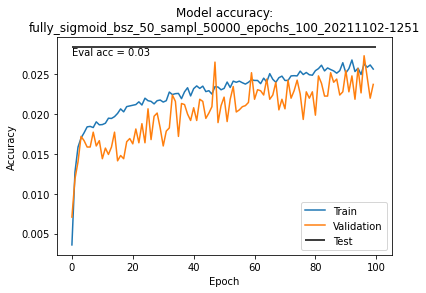

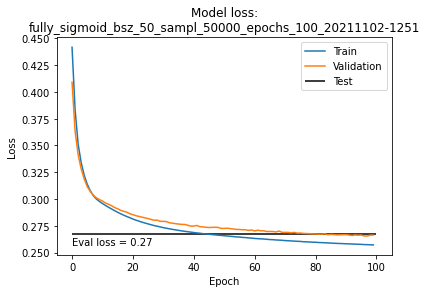

In [51]:
import matplotlib.pyplot as plt
import json
import math

# print("len(history.history[\"loss\"]):", len(history.history["loss"]))
# print("history.history:\n", json.dumps(history.history, indent=2))
print("history:", history.history.keys())
epochs_run = len(history.history["loss"])


# summarize history for accuracy
# plt.figure(dpi=150)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.hlines(y=eval_acc, xmin=0, xmax=epochs_run)
plt.text(x=0, y=eval_acc-0.001, s="Eval acc = " + str(round(eval_acc, 2)))
plt.title('Model accuracy:\n' + model_name)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.savefig("model_plots/acc_plot_" + model_name + ".png", bbox_inches="tight", dpi=150)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.hlines(y=eval_loss, xmin=0, xmax=epochs_run)
plt.text(x=0, y=eval_loss-0.01, s="Eval loss = " + str(round(eval_loss, 2)))
plt.title('Model loss:\n' + model_name)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')
plt.savefig("model_plots/loss_plot_" + model_name + ".png", bbox_inches="tight", dpi=150)
plt.show()